In [3]:
import numpy as np
from matplotlib import pyplot as plt

In [4]:
data_raw =  np.load('data_pre.npy').T

In [5]:
data_raw.shape

(697655, 120)

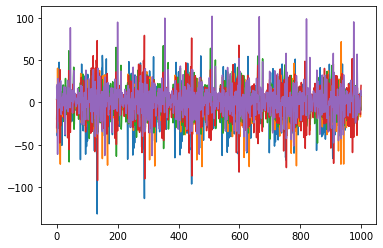

In [6]:
plt.plot(data_raw[:1000, :5])
plt.show()

In [7]:
piece = data_raw[:1000, :5]

In [204]:
def get_kernel(sigma=2):
    size = sigma * 10 + 1
    kernel = list(range(size))
    kernel = [float(k)-int(size/2) for k in kernel]
    
    def gauss(x, sigma=sigma):
        return 1/np.sqrt(2*np.pi*sigma**2)*np.exp(-1/2*(x/sigma)**2)
    
    kernel = [gauss(k) for k in kernel]
    kernel = [k/np.sum(kernel) for k in kernel]
    return kernel

def smoothen(data, kernel):
    data_final = data.copy()
    for i in range(data.shape[1]):
        data_conv = np.convolve(data[:, i], kernel)
        pad = int(len(kernel)/2)
        data_final[:, i] = data_conv[pad:-pad]
    return data_final

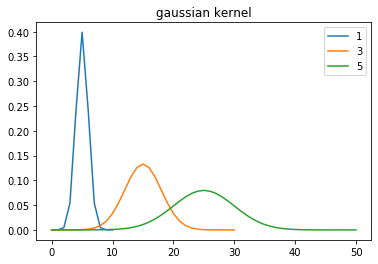

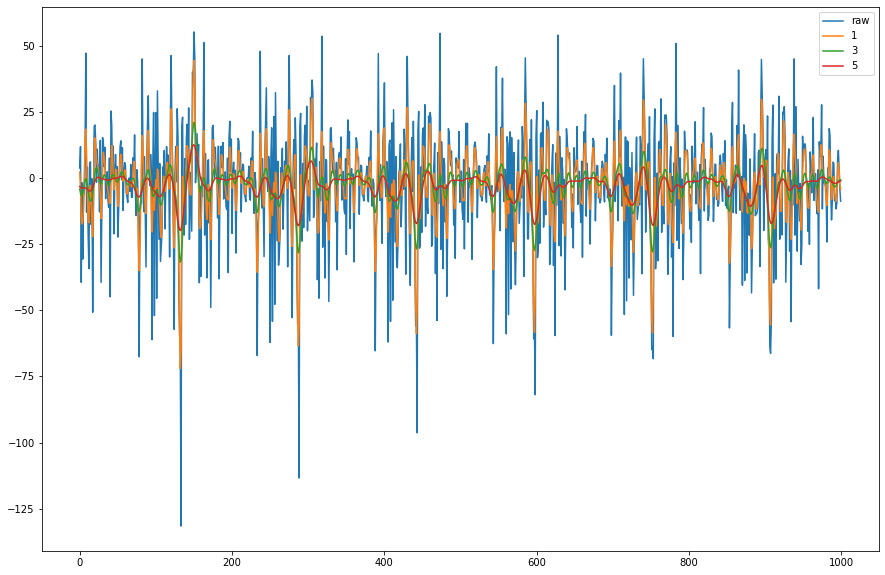

In [256]:
kernel_sizes = [1, 3, 5]

for k in kernel_sizes:
    plt.plot(get_kernel(k), label='{}'.format(k))
plt.title('gaussian kernel')
plt.legend()
plt.show()

fig = plt.figure(figsize=(15,10))
plt.plot(piece[:, 0], label='raw')
for k in kernel_sizes:
    plt.plot(smoothen(piece, get_kernel(k))[:, 0], label='{}'.format(k))
plt.legend()
plt.show()

In [242]:
data_smooth = smoothen(data_raw, get_kernel(3))

In [243]:
np.save('data_smooth.npy', data_smooth)

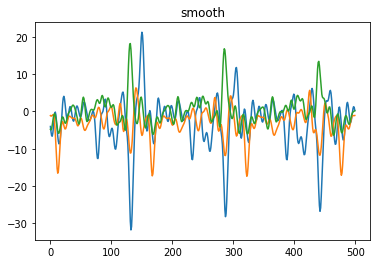

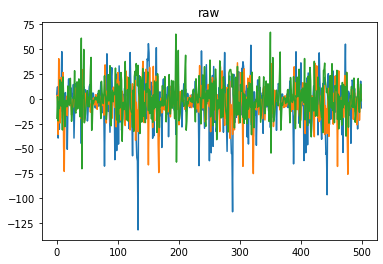

In [253]:
plt.plot(data_smooth[:500, :3])
plt.title('smooth')
plt.show()
plt.plot(data_raw[:500, :3])
plt.title('raw')
plt.show()

Applied Gaussian kernel to the raw data with a kernel size of 31 and a standard deviation of sigma=3, hence variance of 9.

In [257]:
data_smooth.shape

(697655, 120)

In [259]:
data_smooth[:1000]

array([[-4.02606093, -1.11471407, -4.78255662, ...,  4.77263824,
         4.39153529, -0.7383497 ],
       [-5.47919652, -1.24563094, -4.94873674, ...,  5.46540176,
         5.36639973, -1.93237648],
       [-6.49162336, -1.21515755, -4.53677936, ...,  5.49231992,
         6.05381145, -3.03457817],
       ...,
       [ 0.47879966, -2.34648321, -0.93999388, ..., -1.66206405,
         3.81834823,  6.72476173],
       [ 0.87963507, -2.0373681 , -1.19465409, ..., -2.72314196,
         3.28017189,  8.2404827 ],
       [ 0.95013077, -2.00059466, -1.50164976, ..., -3.82960515,
         2.26975416,  8.83654534]])